In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import SpatialDropout2D
from keras.layers import Flatten
from keras.layers import (Input, MaxPooling2D, BatchNormalization)
from keras.optimizers import SGD
from keras.optimizers import Adam
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

np.random.seed(4)

# 1. Display an image using matplotlib (or another tool)
You will most likely need to reshape your data like this to put into your model

In [4]:
data = pd.read_csv("finalTrain.csv")

# Convert data to target and image (and reshape)
target = data["label"].to_numpy()
images_raw = data.drop("label", 1).to_numpy()

images = np.empty((images_raw.shape[0], 28, 28))

for i in range(len(images)):
    images[i] = images_raw[i].reshape(28, 28)

images.shape

C:\Users\Jacob\AppData\Local\Temp\ipykernel_23928\4241746926.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  images_raw = data.drop("label", 1).to_numpy()


(60000, 28, 28)

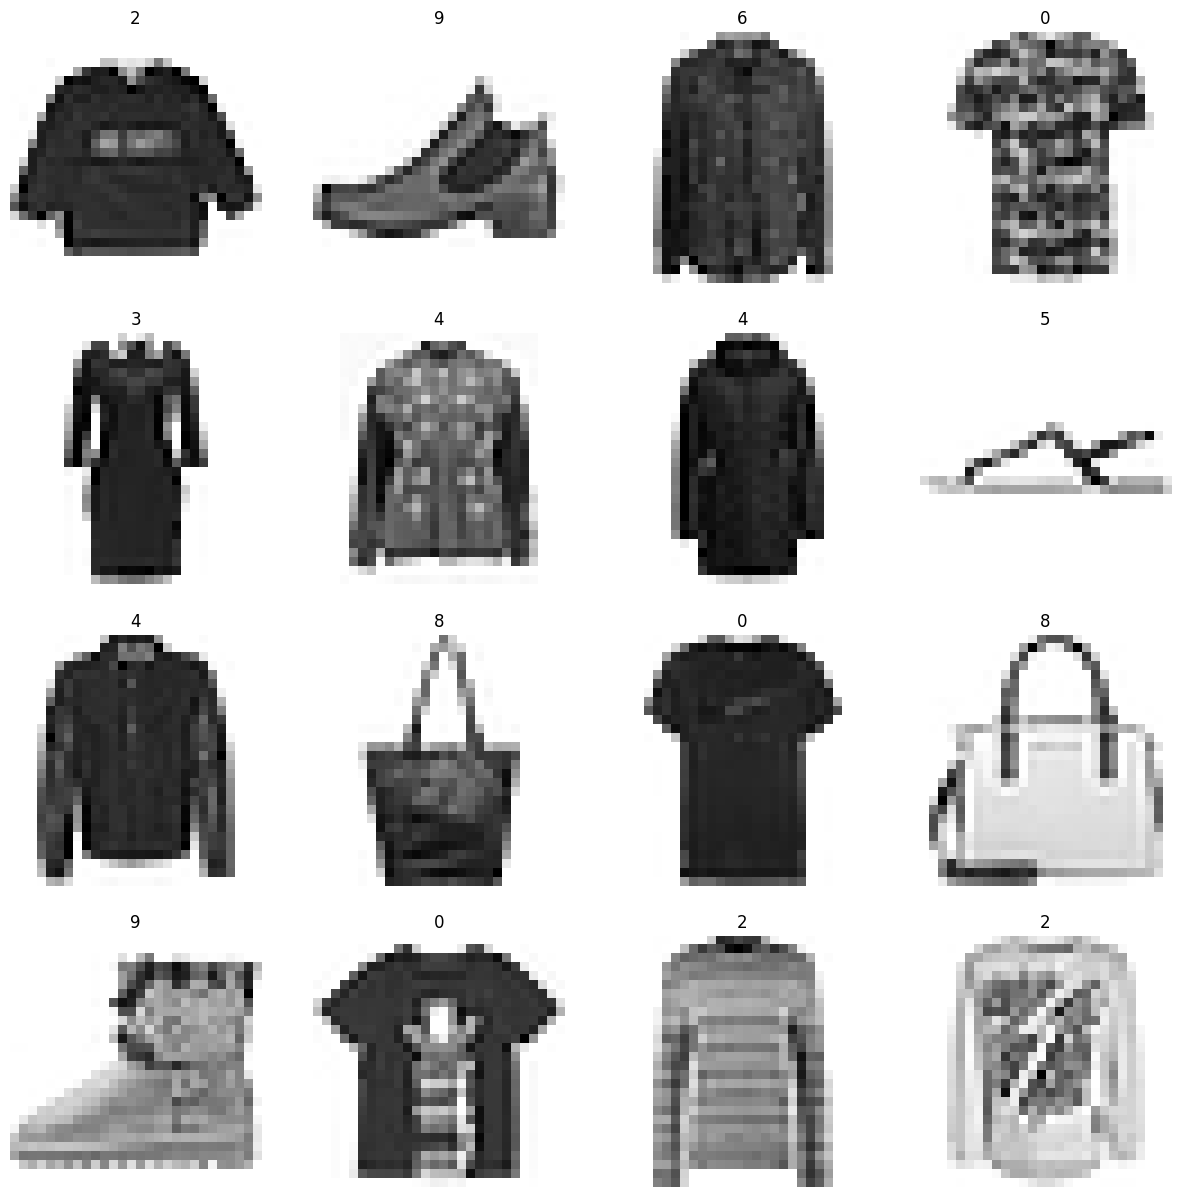

In [5]:
def plot_multi(i):
    '''Plots 16 digits, starting with digit i'''
    nplots = 16
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(images[i+j], cmap='binary')
        plt.title(target[i+j])
        plt.axis('off')
    plt.show()

plot_multi(0)

# 2. Divide the finalTrain.csv data set into a training set and a validation set (Willem talked about this in his lecture)

In [6]:
y = target
x = images

x = x.reshape((x.shape[0], 28, 28, 1))
y = to_categorical(y)

# Normalize
x = x.astype("float32")
x = x / 255.0

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

val_count = 8000
X_val = x_test[:val_count]
y_val = y_test[:val_count]
x_test = x_test[val_count:]
y_test = y_test[val_count:]

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], X_val.shape[2], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

x_train, y_train = shuffle(x_train, y_train)
x_val, y_val = shuffle(x_val, y_val)
x_test, y_test = shuffle(x_test, y_test)

# 3. Decide on a build a model architecture

In [7]:
# model = Sequential()
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
# # model.add(SpatialDropout2D(0.2))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# # model.add(Dropout(0.5))
# model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
# model.add(Dense(10, activation='softmax'))

# model.compile(optimizer=SGD(lr=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

keras.backend.clear_session()

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# model.compile(optimizer=Adam(lr=0.0001, decay=1e-6), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=Adam(lr=0.0001, decay=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\Jacob\Documents\Projects\CampQMINDTeamB20\FashionClassifierModel\.venv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


# 4. Train the model (decide on epochs etc.)

In [8]:
# history = model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=2, validation_data=(x_test, y_test))
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_data=(x_val, y_val), callbacks=None)

Epoch 1/25
1500/1500 [==============================] - 13s 7ms/step - loss: 0.4130 - accuracy: 0.8500 - val_loss: 0.3050 - val_accuracy: 0.8855
Epoch 2/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2642 - accuracy: 0.9025 - val_loss: 0.2708 - val_accuracy: 0.8996
Epoch 3/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2045 - accuracy: 0.9240 - val_loss: 0.2635 - val_accuracy: 0.9085
Epoch 4/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1640 - accuracy: 0.9394 - val_loss: 0.2473 - val_accuracy: 0.9140
Epoch 5/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1272 - accuracy: 0.9524 - val_loss: 0.2553 - val_accuracy: 0.9105
Epoch 6/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1015 - accuracy: 0.9627 - val_loss: 0.2769 - val_accuracy: 0.9111
Epoch 7/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0799 - accuracy: 0.9701 - val_loss: 0.2994 - val_ac

# 4.5. Save the model

In [10]:
model.save("model")

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


# 5. Validate the model to get an idea of accuracy

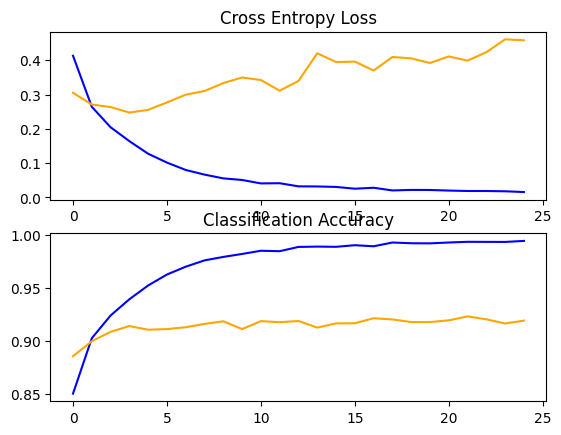

In [11]:
# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.show()

In [12]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 92.150


# 6. Predict the classes of the finalPredict.csv data

In [13]:
# Read data
predictions = pd.read_csv("finalPredict.csv")
predictions_x = predictions.to_numpy()
predictions_x.shape

(10000, 784)

In [14]:
# Format data properly
pred_x = np.empty((predictions_x.shape[0], 28, 28))

for i in range(len(predictions_x)):
    pred_x[i] = predictions_x[i].reshape(28, 28)

pred_x = pred_x.reshape((pred_x.shape[0], 28, 28, 1))
pred_x = pred_x.astype("float32")
pred_x = pred_x / 255.0
pred_x = np.reshape(pred_x, (pred_x.shape[0], pred_x.shape[1], pred_x.shape[2], 1))
pred_x.shape

(10000, 28, 28, 1)

In [15]:
# Runs predictions
pred_y = np.argmax(model.predict(x_test), axis=-1)
pred_y.shape

125/125 [==============================] - 0s 2ms/step


(4000,)

In [16]:
# Save results
results = pd.DataFrame({"True Label": pred_y})
results.to_csv(r"team20Results.csv", index=False)
results.head()

,True Label
0,9
1,1
2,7
3,0
4,7
